# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Model

In [3]:
class LR:
    def __init__(self):
        self.m = None
        self.y = None
        self.X = None
        self.z = None
        self.w = None
        self.b = None

    def predict(self, test):
        return np.round(self.sigmoid(test@self.w + self.b))

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
        
    def fit(self, X, y, lr, epochs):
        # update rule
        # loss = -(y log(p) + (1-y) log(1-p)
        # w = w + alpha (y - y_hat)X
        # b = b + alpha (y - y_hat)
        epsilon = 1e-8
        self.X = X
        self.y = y
        self.m = len(self.X)
        self.w = np.array(np.random.normal(0.0, 1.0, size=self.X.shape[1]).reshape(-1,1))
        self.b = np.array(np.random.normal(0.0, 1.0))
        loss = [] 
        
        for i in range(epochs):

            y_pred = np.array(self.X @ self.w + self.b)
            self.z = self.sigmoid(y_pred)
            self.z = np.clip(self.z, epsilon, 1 - epsilon)

            cost = -np.mean( (y*np.log(self.z)) + ((1-y)*np.log(1-self.z)) )
            loss.append(cost)
            
            dw = self.X.T @ (self.z - self.y) / self.m
            db = np.mean(self.z - self.y)
            
            self.w -= lr * dw
            self.b -= lr * db

            if i%100 == 0:
                print(i,cost)
            if cost <= epsilon:
                print(f"cost is low: {cost}")
                break
                
        return self.w, self.b, loss

# Testing Model

In [5]:
data = load_breast_cancer()
X, y = data.data, data.target

In [9]:
X = StandardScaler().fit_transform(X)
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [11]:
model = LR()

In [13]:
y = y.reshape(-1,1)

In [15]:
w,b,loss = model.fit(X,y, lr = 0.1, epochs = 1000)

0 1.3736663878713729
100 0.15843850310453272
200 0.09573557320881078
300 0.07807821732653426
400 0.07076767559981592
500 0.06671390733028922
600 0.06405836686439682
700 0.06214449601159496
800 0.06067242735320099
900 0.0594859379156904


In [17]:
y_pred = model.predict(X)
me = accuracy_score(y,y_pred)
me

0.984182776801406

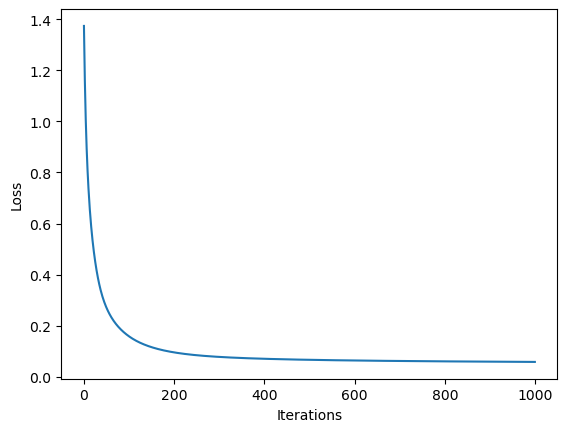

In [19]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(loss);

# Logistic Regression Built-in 

In [22]:
model = LogisticRegression(max_iter = 1000)
model.fit(X,y.ravel())
y_pred = model.predict(X)
u = accuracy_score(y,y_pred)
u

0.9876977152899824

In [24]:
print(f"diff between my model and built in {abs(me-u)}")

diff between my model and built in 0.0035149384885764245


# Without Sigmoid

In [53]:
W = np.array(np.linalg.inv(X.T @ X) @ X.T @ y).reshape(-1,1)

In [55]:
W.shape

(31, 1)

In [57]:
y_pred = X@W

In [59]:
y_pred[:5]

array([[-0.04557482],
       [ 0.15786964],
       [-0.13131986],
       [-0.19228819],
       [ 0.1655534 ]])